In [1]:
import matplotlib.pyplot as plt
from IPython.display import Math, display
import numpy as np
import sympy as sp
from scipy import constants as const
from tqdm import tqdm

#add relative path to backend
import sys
sys.path.append('../../clean_diag/backend')

import trap_units as si
from twod_trap import PancakeTrap

from spilling_helpers import *

In [2]:
initial_power = 91 * si.uW 
initial_grad = 0 * si.G/si.cm

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= initial_grad,
    grad_r=0,
    power_tweezer= initial_power,
    waist_tweezer= 2.16/2 * si.um,

    m= 161 * const.value("atomic mass constant"),
    mu_b= 9.93 * const.value("Bohr magneton" ),
    a=180*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 532 * si.nm,
)
axial_width = trap.get_tweezer_rayleigh()
zr = float(trap.subs(trap.get_tweezer_rayleigh()))

x, y, z = trap.x, trap.y, trap.z

print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))/2/np.pi:.3f} Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

333.017 Hz
2.01106353355856 uK


<IPython.core.display.Math object>

In [3]:
zr/si.um

6.887882840502134

0.91666666666669

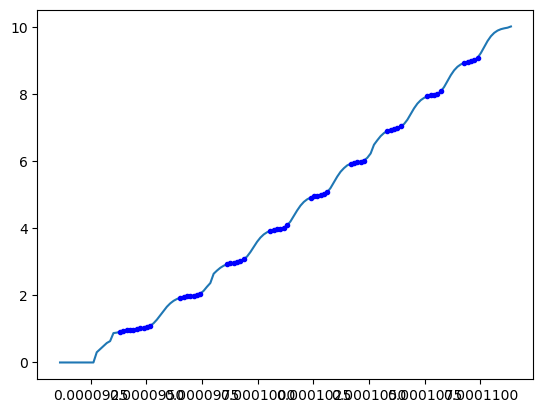

In [20]:
powers, atom_number = sweep_power_old(trap, 0*si.G/si.cm, 0.15*si.uW, 100, -0.*zr, 1.1*zr,max_spill_steps=250, max_atoms=10)
calculate_stepsize(powers,atom_number,plot=True)/si.uW

In [21]:
float(powers[0])/si.uW

91.12170219141973

In [22]:
float(powers[-1])/si.uW

111.37170219141973

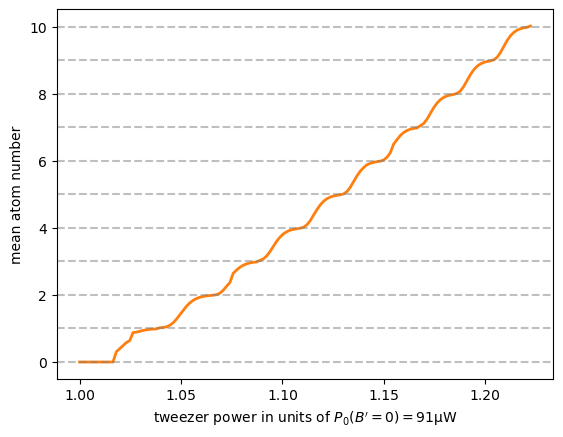

In [25]:
plt.plot(powers/powers[0], atom_number, linewidth=2, color="tab:orange")
plt.axhline(0, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(1, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(2, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(3, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(4, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(5, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(6, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(7, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(8, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(9, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(10, color="grey", linestyle="dashed",alpha=0.5)

#plt.xlim(1,1.23)
#plt.ylim(0,10.5)

plt.xlabel(r"tweezer power in units of $P_0(B'=0) = 91 \text{µW}$")
plt.ylabel("mean atom number")
#plt.title("Controll over particle number with Dysprosium")

plt.savefig("stepplot_0G.png", dpi = 300)

plt.show()

0.025777777777777785

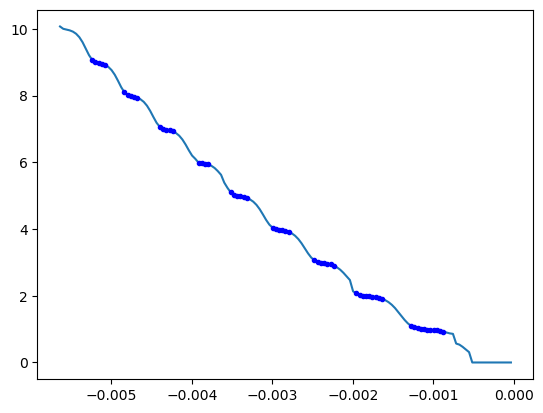

In [18]:
gradients, atom_number = sweep_gradient_old(trap, 91*si.uW, 0.004*si.G/si.cm, 50, -0.0*zr, 1.1*zr,max_spill_steps=200)
calculate_stepsize(gradients,atom_number,plot=True)/si.G*si.cm

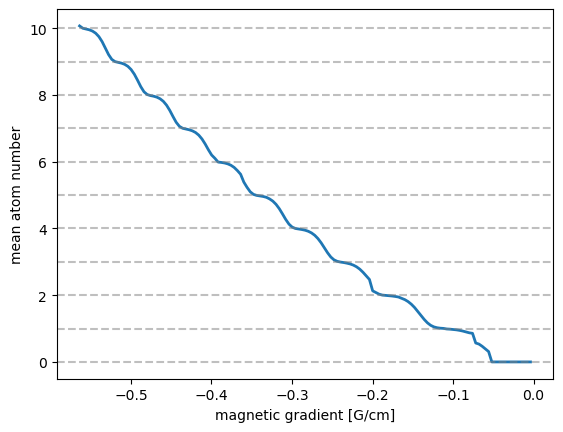

In [19]:
plt.plot(gradients/si.G*si.cm, atom_number, linewidth=2)
plt.axhline(0, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(1, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(2, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(3, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(4, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(5, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(6, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(7, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(8, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(9, color="grey", linestyle="dashed",alpha=0.5)
plt.axhline(10, color="grey", linestyle="dashed",alpha=0.5)

#plt.xlim(1,1.23)
#plt.ylim(0,10.5)

plt.xlabel(r"magnetic gradient [G/cm]")
plt.ylabel("mean atom number")
#plt.title("Controll over particle number with Dysprosium")

plt.savefig("stepplot_grad.png", dpi = 300)

plt.show()

# Sensibilities

In [27]:
data_1064 = np.load("data/sweeps_1064.npz")
data_532 = np.load("data/sweeps_532.npz")


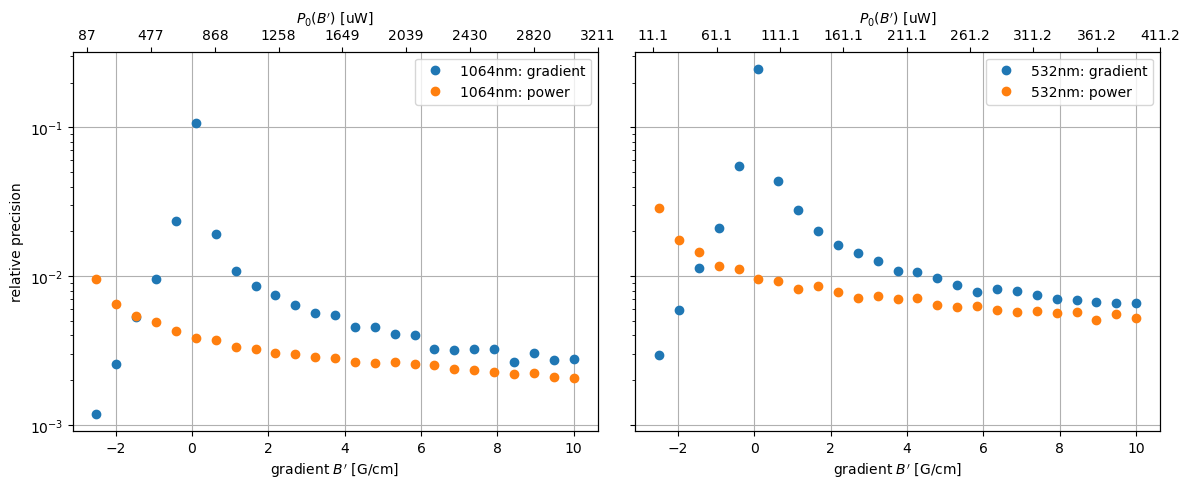

In [ ]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Left plot
ax2 = ax1.twiny()

ax1.set_yscale("log")
ax1.plot(data_1064["gradient"]/si.G*si.cm, data_1064["gradient_rel"], "o", label="1064nm: gradient")
ax1.plot(data_1064["gradient"]/si.G*si.cm, data_1064["power_rel"], "o", label="1064nm: power")

#ax1.set_title(r"relative precision (1064nm, a=184, $\eta$=9)")
ax1.set_xlabel(r"gradient $B'$ [G/cm]")
ax1.set_ylabel(r"$\delta B'_{10\%}/B'$ [G/cm]")

new_tick_locations = data_1064["power"][::3]/si.uW
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xlabel(r"$P_0(B')$ [uW]")

ax1.legend()
ax1.grid()

# Right plot (duplicate or variant)
ax4 = ax3.twiny()

ax3.set_yscale("log")
ax3.plot(data_532["gradient"]/si.G*si.cm, data_532["gradient_rel"], "o", label="532nm: gradient")
ax3.plot(data_532["gradient"]/si.G*si.cm, data_532["power_rel"], "o", label="532nm: power")

#ax3.set_title(r"relative precision (second condition)")
ax3.set_xlabel(r"gradient $B'$ [G/cm]")

new_tick_locations = data_532["power"][::3]/si.uW
ax4.set_xlim(ax3.get_xlim())
ax4.set_xticks(new_tick_locations)
ax4.set_xlabel(r"$P_0(B')$ [uW]")

ax3.legend()
ax3.grid()

plt.tight_layout()

plt.savefig("rel_err.png", dpi=300)
plt.show()


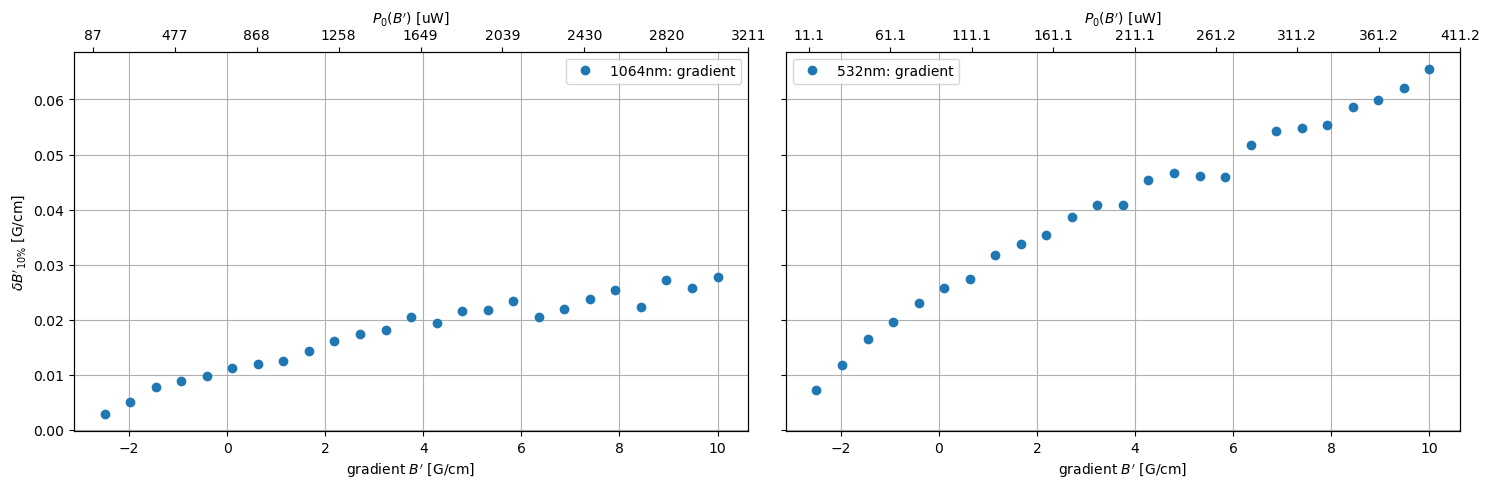

In [32]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Left plot
ax2 = ax1.twiny()

ax1.set_yscale("linear")
ax1.plot(data_1064["gradient"]/si.G*si.cm, data_1064["gradient_step"]/si.G*si.cm,"o", label="1064nm: gradient")
# ax1.plot(data["gradient"]/si.G*si.cm, data["power_step"]/si.uW, "o", label="power")

#ax1.set_title("absolute precision (1064nm, a=184, η=9)")
ax1.set_xlabel(r"gradient $B'$ [G/cm]")
ax1.set_ylabel(r"$\delta B'_{10\%}$ [G/cm]")

new_tick_locations = data_1064["power"][::3]/si.uW
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xlabel(r"$P_0(B')$ [uW]")

ax1.legend()
ax1.grid()

# Right plot (could use different or same data)
ax4 = ax3.twiny()

ax3.set_yscale("linear")
ax3.plot(data_532["gradient"]/si.G*si.cm, data_532["gradient_step"]/si.G*si.cm,"o", label="532nm: gradient")
# ax3.plot(data["gradient"]/si.G*si.cm, data["power_step"]/si.uW, "o", label="power")

#ax3.set_title("absolute precision (532nm, a=180, η=9)")
ax3.set_xlabel(r"gradient $B'$ [G/cm]")

new_tick_locations = data_532["power"][::3]/si.uW
ax4.set_xlim(ax3.get_xlim())
ax4.set_xticks(new_tick_locations)
ax4.set_xlabel(r"$P_0(B')$ [uW]")

ax3.legend()
ax3.grid()

plt.tight_layout()

plt.savefig("abs_gradient.png", dpi=300)
plt.show()


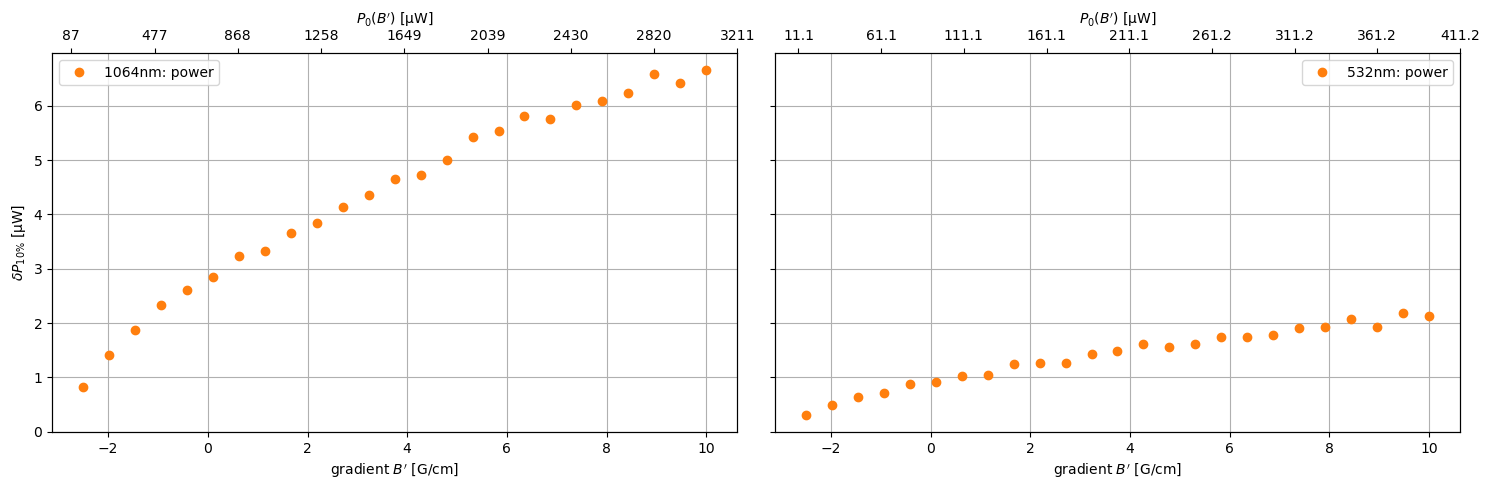

In [33]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Left plot
ax2 = ax1.twiny()

ax1.set_yscale("linear")
ax1.plot(data_1064["gradient"]/si.G*si.cm, data_1064["power_step"]/si.uW,"o", color="tab:orange", label="1064nm: power")
# ax1.plot(data["gradient"]/si.G*si.cm, data["power_step"]/si.uW, "o", label="power")

#ax1.set_title("absolute precision (1064nm, a=184, η=9)")
ax1.set_xlabel(r"gradient $B'$ [G/cm]")
ax1.set_ylabel(r"$\delta P_{10\%}$ [µW]")

new_tick_locations = data_1064["power"][::3]/si.uW
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xlabel(r"$P_0(B')$ [µW]")

ax1.legend()
ax1.grid()

# Right plot (could use different or same data)
ax4 = ax3.twiny()

ax3.set_yscale("linear")
ax3.plot(data_532["gradient"]/si.G*si.cm, data_532["power_step"]/si.uW,"o", color="tab:orange", label="532nm: power")
# ax3.plot(data["gradient"]/si.G*si.cm, data["power_step"]/si.uW, "o", label="power")

#ax3.set_title("absolute precision (532nm, a=180, η=9)")
ax3.set_xlabel(r"gradient $B'$ [G/cm]")

new_tick_locations = data_532["power"][::3]/si.uW
ax4.set_xlim(ax3.get_xlim())
ax4.set_xticks(new_tick_locations)
ax4.set_xlabel(r"$P_0(B')$ [µW]")

ax3.legend()
ax3.grid()

plt.tight_layout()

plt.savefig("abs_power.png", dpi=300)
plt.show()


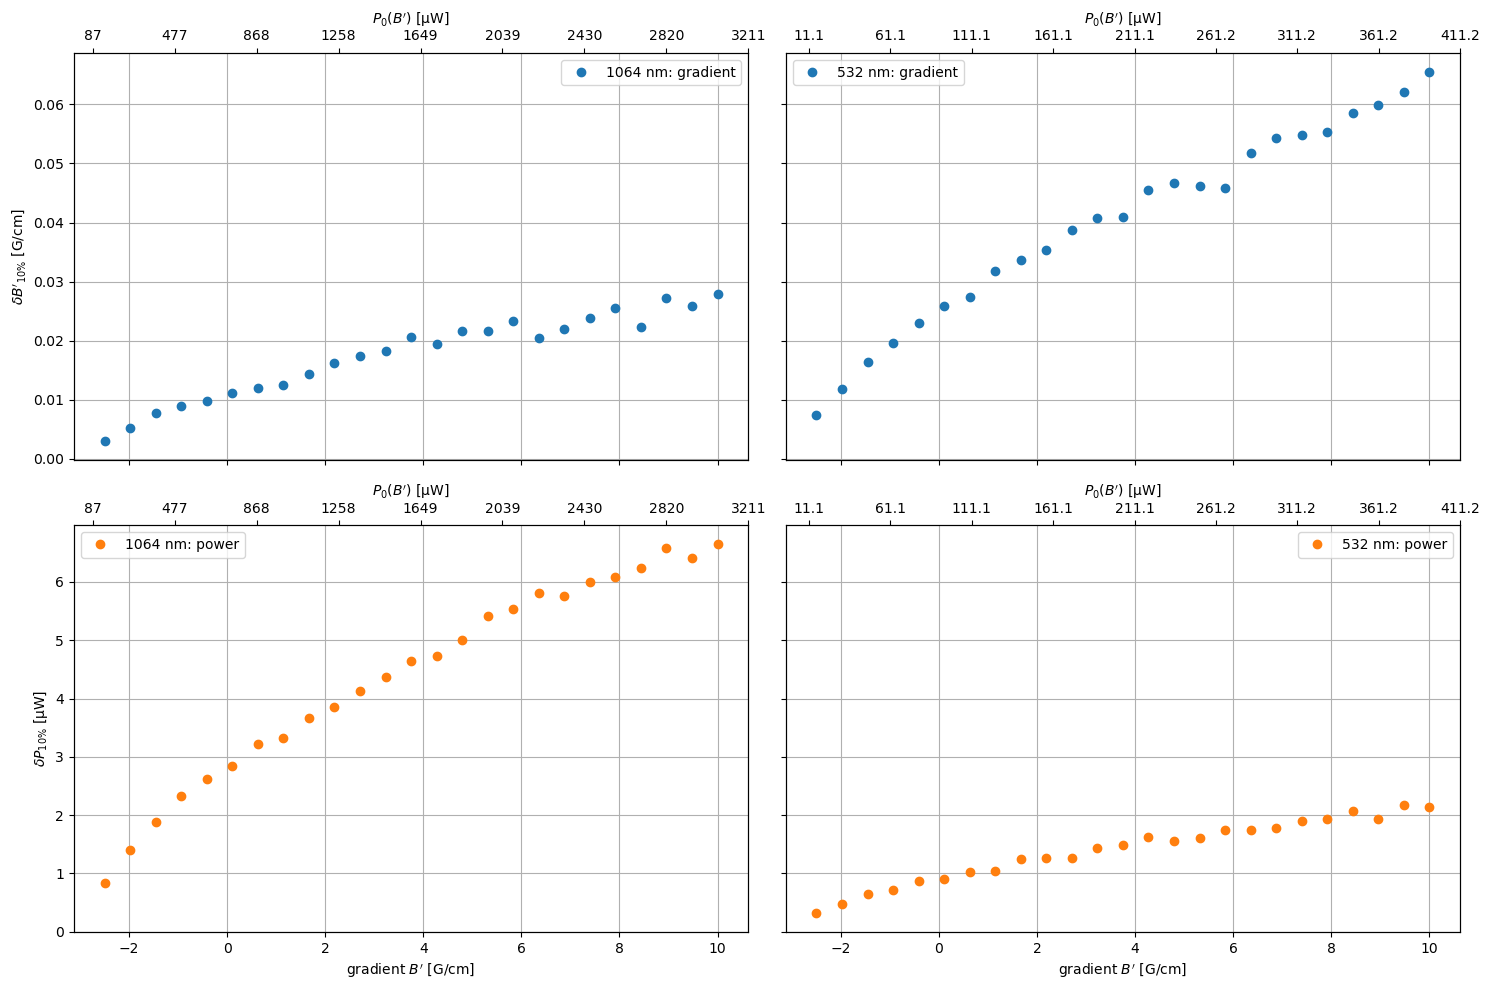

In [34]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey='row')

# -------------------------------
# Top-left (1064 nm: δB' precision)
ax1     = axs[0, 0]
ax1_top = ax1.twiny()

ax1.set_yscale("linear")
ax1.plot(data_1064["gradient"]/si.G*si.cm,
         data_1064["gradient_step"]/si.G*si.cm,
         "o", label="1064 nm: gradient")

ax1.set_ylabel(r"$\delta B'_{10\%}$ [G/cm]")
#ax1.set_title("Absolute δB' precision (1064 nm)")
ax1.grid()
ax1.legend(loc="best")

ticks_1064 = data_1064["power"][::3]/si.uW
ax1_top.set_xlim(ax1.get_xlim())
ax1_top.set_xticks(ticks_1064)
ax1_top.set_xlabel(r"$P_0(B')$ [µW]")


# -------------------------------
# Top-right (532 nm: δB' precision)
ax2     = axs[0, 1]
ax2_top = ax2.twiny()

ax2.set_yscale("linear")
ax2.plot(data_532["gradient"]/si.G*si.cm,
         data_532["gradient_step"]/si.G*si.cm,
         "o", label="532 nm: gradient")

#ax2.set_title("Absolute δB' precision (532 nm)")
ax2.grid()
ax2.legend(loc="best")

ticks_532 = data_532["power"][::3]/si.uW
ax2_top.set_xlim(ax2.get_xlim())
ax2_top.set_xticks(ticks_532)
ax2_top.set_xlabel(r"$P_0(B')$ [µW]")


# -------------------------------
# Bottom-left (1064 nm: δP precision)
ax3     = axs[1, 0]
ax3_top = ax3.twiny()

ax3.set_yscale("linear")
ax3.plot(data_1064["gradient"]/si.G*si.cm,
         data_1064["power_step"]/si.uW,
         "o", color="tab:orange", label="1064 nm: power")

ax3.set_ylabel(r"$\delta P_{10\%}$ [µW]")
ax3.set_xlabel(r"gradient $B'$ [G/cm]")
#ax3.set_title("Absolute δP precision (1064 nm)")
ax3.grid()
ax3.legend(loc="best")

ax3_top.set_xlim(ax3.get_xlim())
ax3_top.set_xticks(ticks_1064)
ax3_top.set_xlabel(r"$P_0(B')$ [µW]")


# -------------------------------
# Bottom-right (532 nm: δP precision)
ax4     = axs[1, 1]
ax4_top = ax4.twiny()

ax4.set_yscale("linear")
ax4.plot(data_532["gradient"]/si.G*si.cm,
         data_532["power_step"]/si.uW,
         "o", color="tab:orange", label="532 nm: power")

ax4.set_xlabel(r"gradient $B'$ [G/cm]")
#ax4.set_title("Absolute δP precision (532 nm)")
ax4.grid()
ax4.legend(loc="best")

ax4_top.set_xlim(ax4.get_xlim())
ax4_top.set_xticks(ticks_532)
ax4_top.set_xlabel(r"$P_0(B')$ [µW]")


# -------------------------------
plt.tight_layout()
plt.savefig("abs_precision_2x2_shared.png", dpi=300)
plt.show()
